In [1]:
# OBSERVATIONS AND INFERENCES

# 1. The data does not take into consideration the potential differences between male and female mice anatomy, and whether certain regimes may affect a male or female mouse differently.
#    The data however, reflects an even proportion of male to female mice, that seems to be comparative of each other. 

# 2. Ramicane and Capomulin appear to be the most effective regimens and should have continued testing. Both regimens also have the smallest standard deviation.
#    Iluding to the idea that the mice undergoing those two regimens have tumor sizes that do not fluctuate as much compared to the other regimens.

# 3. The correlation between weight and average tumor size for the Capomulin regimen is 0.84. This implies there is a strong positive relationship.
#    A strong positive relationship means that the more a mouse weighs, the greater the tumor size will be on the mouse. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
# Visualize data before proceeding

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Visualize data before proceeding

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine data into a single dataset with common variable "Mouse ID" & display

merge_data_all_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

merge_data_all_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice

number_of_dup_mice = merge_data_all_df["Mouse ID"].count()
print("Duplicates:", number_of_dup_mice)

number_mice_count = merge_data_all_df["Mouse ID"].nunique()
print("Number of Mice:", number_mice_count)

Duplicates: 1893
Number of Mice: 249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

number_of_dup_mice = merge_data_all_df.groupby("Mouse ID")["Timepoint"].nunique()
number_of_dup_mice.head()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
Name: Timepoint, dtype: int64

In [8]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID

clean_df = merge_data_all_df.drop_duplicates(subset='Mouse ID', keep='last')
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [9]:
# Checking the number of mice in the clean DataFrame

clean_mice = clean_df["Mouse ID"].count()
print("Clean Count Mice:", clean_mice)

Clean Count Mice: 249


In [10]:
# SUMMARY STATISTICS

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().round(2)

median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().round(2)

var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().round(2)

std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().round(2)

sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().round(2)

# Create a table to display the summary stats

summary_stats = pd.DataFrame({
    "Mean" : mean,
    "Median" : median,
    "Variance" : var,
    "Standard Deviation": std,
    "SEM" : sem
})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


In [11]:
# BAR AND PIE CHARTS

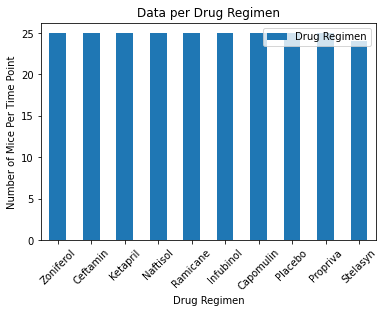

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

total_drugs = pd.DataFrame(pd.value_counts(clean_df["Drug Regimen"]))

total_drugs.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.show()

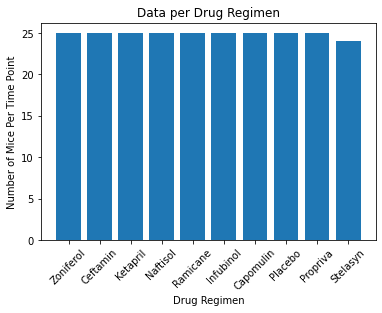

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

x_axis = clean_df["Drug Regimen"].value_counts().index
y_axis = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis)
plt.xticks(x_axis, rotation = 45)
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.title("Data per Drug Regimen")
plt.show()

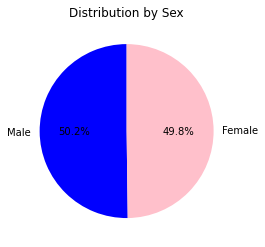

In [14]:
 # Generate a pie plot showing the distribution of female versus male mice using Pandas

 gender_count = clean_df['Sex'].value_counts()

 gender_pie_plot = gender_count.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'], title='Distribution by Sex')
 gender_pie_plot.set_ylabel('')
 plt.show()

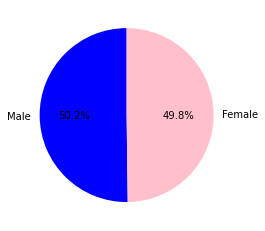

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = clean_df['Sex'].value_counts()

plt.pie(
    gender_count,
    labels = ['Male', 'Female'],
    colors = ["blue", "pink"],
    autopct='%1.1f%%',
    startangle=90
)

plt.show()

In [16]:
# QUARTILES, OUTLIERS, AND BOXPLOTS

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest timepoint) for each mouse
greatest_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
greatest_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, greatest_timepoint_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,45,22.050126,1,45
1,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,m601,Capomulin,Male,22,17,45,28.430964,1,45
4,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes

    drug_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]

    # add subset

    final_vol_df = drug_df.loc[drug_df['Timepoint'] == drug_df['Max Timepoint']]

    final_values = final_vol_df['Tumor Volume (mm3)']

    tumor_vol_data.append(final_values)

    # Determine outliers using upper and lower bounds

    quartiles = final_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f'IQR for {treatment}: {iqr}')

    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')

    # Check for any outliers

    outliers_count = (final_values.loc[(final_vol_df['Tumor Volume (mm3)'] >= upper_bound) | (final_vol_df['Tumor Volume (mm3)'] <= lower_bound)]).count()

    print(f'Number of {treatment} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


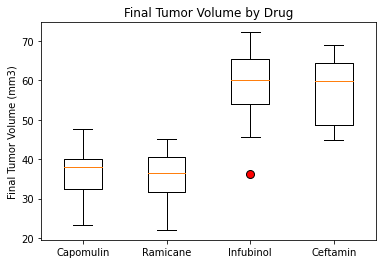

In [19]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest

 # Edit outliers on boxplot for visibility
box_plot_display = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_vol_data, flierprops=box_plot_display)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

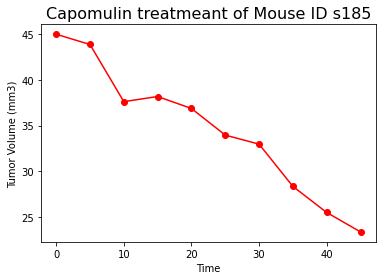

In [20]:
# LINE AND SCATTER PLOTS

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = merge_data_all_df.loc[merge_data_all_df['Drug Regimen'] == 'Capomulin']

selected_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']

x_axis = selected_mouse_df['Timepoint']
y_axis = selected_mouse_df['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis, marker="o", color="red")

plt.title("Capomulin treatmeant of Mouse ID s185",fontsize =16)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create data fram with just Capomulin data

capomulin_df = merge_data_all_df.loc[merge_data_all_df['Drug Regimen'] == 'Capomulin']
capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [22]:
# Find the average tumor volume for each mouse and display

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_vol_df.head()

,Mouse ID,Average Tumor Volume
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344


In [23]:
# Merge the two data frames from above

merged_avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
merged_avg_vol_df. head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Average Tumor Volume
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143


In [24]:
final_avg_vol_df = merged_avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_vol_df.head()

,Weight (g),Average Tumor Volume
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495


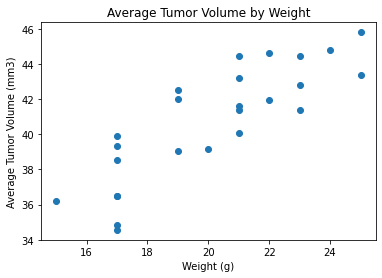

In [25]:
x_axis = final_avg_vol_df['Weight (g)']
y_axis = final_avg_vol_df['Average Tumor Volume']

plt.scatter(x_axis, y_axis)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()

In [26]:
# CORRELATION & REGRESSION

The correlation between weight and average tumor volume for the Capomulin regimen is 0.84.


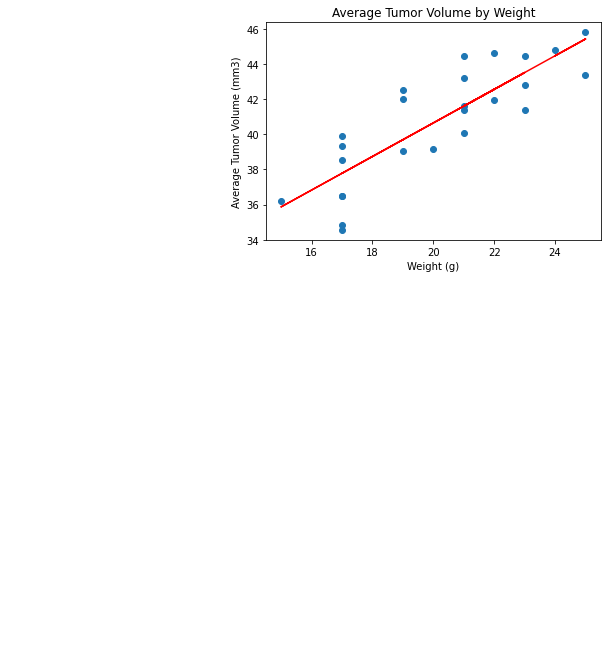

In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight and avg tumor volume for the Capomulin regimen

from scipy.stats import linregress

# Generate scatter plot data to begin (copy and pasted from above)

capomulin_df = merge_data_all_df.loc[merge_data_all_df['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

merged_avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')

final_avg_vol_df = merged_avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()

x_axis = final_avg_vol_df['Weight (g)']
y_axis = final_avg_vol_df['Average Tumor Volume']

# Calculate correlation coefficient

corr_coef = st.pearsonr(x_axis, y_axis)

print(f'The correlation between weight and average tumor volume for the Capomulin regimen is {round(corr_coef[0],2)}.')

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Plot the scatter with the calculated linear regression
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()